# Import

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os

In [8]:
load_dotenv() 
DATASET_FOLDER = os.getenv('DATASET_FOLDER')

In [9]:
raw_df = pd.read_csv(f"{DATASET_FOLDER}/Food_Establishment_Inspection_Data.csv")
raw_df

/tmp/ipykernel_216913/2692780275.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv(f"{DATASET_FOLDER}/Food_Establishment_Inspection_Data.csv")


,Name,Program Identifier,Inspection Date,Description,Address,City,Zip Code,Phone,Longitude,Latitude,...,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Description,Violation Points,Business_ID,Inspection_Serial_Num,Violation_Record_ID,Grade
0,#807 TUTTA BELLA,#807 TUTTA BELLA,03/02/2023,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,...,20.0,Unsatisfactory,False,RED,1300 - Food contact surfaces cleaned and sanit...,15,PR0089260,DAJ5DTHLV,IVBTPZO0B,1.0
1,#807 TUTTA BELLA,#807 TUTTA BELLA,03/02/2023,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,...,20.0,Unsatisfactory,False,RED,2120 - Proper cold holding temperatures ( 42 d...,5,PR0089260,DAJ5DTHLV,IV5GOME67,1.0
2,#807 TUTTA BELLA,#807 TUTTA BELLA,08/31/2022,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,...,10.0,Unsatisfactory,False,BLUE,"3200 - Insects, rodents, animals not present; ...",5,PR0089260,DAEEWQC0L,IVQ7QYW2V,1.0
3,#807 TUTTA BELLA,#807 TUTTA BELLA,08/31/2022,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,...,10.0,Unsatisfactory,False,RED,0200 - Food Worker Cards current for all food ...,5,PR0089260,DAEEWQC0L,IV0J437H6,1.0
4,#807 TUTTA BELLA,#807 TUTTA BELLA,01/13/2022,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,...,0.0,Satisfactory,False,NaN,NaN,0,PR0089260,DAWWGK08K,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255577,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,11/27/2017,Seating 0-12 - Risk Category III,11752 15TH AVE NE,SEATTLE,98125,(415) 385-1379,-122.312056,47.715359,...,0.0,Satisfactory,False,NaN,NaN,0,PR0086991,DA3OGNCPY,NaN,2.0
255578,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,09/06/2017,Seating 0-12 - Risk Category III,11752 15TH AVE NE,SEATTLE,98125,(415) 385-1379,-122.312056,47.715359,...,0.0,Complete,False,NaN,NaN,0,PR0086991,DALIX7JOT,NaN,2.0
255579,ZZ DESSERT,ZZ DESSERT,01/23/2023,Seating 0-12 - Risk Category III,18230 E VALLEY HWY STE 178,KENT,98032,(206) 779-0528,-122.220420,47.438930,...,10.0,Satisfactory,False,BLUE,"3400 - Wiping cloths properly used, stored, sa...",5,PR0089412,DAQZ5Q076,IVGU0QCRM,1.0
255580,ZZ DESSERT,ZZ DESSERT,01/23/2023,Seating 0-12 - Risk Category III,18230 E VALLEY HWY STE 178,KENT,98032,(206) 779-0528,-122.220420,47.438930,...,10.0,Satisfactory,False,BLUE,"4400 - Plumbing properly sized, installed,...",5,PR0089412,DAQZ5Q076,IV3MMPWH7,1.0


In [10]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255582 entries, 0 to 255581
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Name                        255582 non-null  object 
 1   Program Identifier          255582 non-null  object 
 2   Inspection Date             254921 non-null  object 
 3   Description                 255582 non-null  object 
 4   Address                     255582 non-null  object 
 5   City                        255582 non-null  object 
 6   Zip Code                    255582 non-null  object 
 7   Phone                       184808 non-null  object 
 8   Longitude                   255179 non-null  float64
 9   Latitude                    255179 non-null  float64
 10  Inspection Business Name    254921 non-null  object 
 11  Inspection Type             254921 non-null  object 
 12  Inspection Score            254882 non-null  float64
 13  Inspection Res

In [44]:
raw_df['Zip Code']

0         98105
1         98105
2         98105
3         98105
4         98105
          ...  
255577    98125
255578    98125
255579    98032
255580    98032
255581    98032
Name: Zip Code, Length: 255582, dtype: object

# Data Wrangling

In [12]:
raw_df.info() ,raw_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255582 entries, 0 to 255581
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Name                        255582 non-null  object 
 1   Program Identifier          255582 non-null  object 
 2   Inspection Date             254921 non-null  object 
 3   Description                 255582 non-null  object 
 4   Address                     255582 non-null  object 
 5   City                        255582 non-null  object 
 6   Zip Code                    255582 non-null  object 
 7   Phone                       184808 non-null  object 
 8   Longitude                   255179 non-null  float64
 9   Latitude                    255179 non-null  float64
 10  Inspection Business Name    254921 non-null  object 
 11  Inspection Type             254921 non-null  object 
 12  Inspection Score            254882 non-null  float64
 13  Inspection Res

(None,
            Longitude       Latitude  Inspection Score  Violation Points  \
 count  255179.000000  255179.000000     254882.000000     255582.000000   
 mean     -122.197295      47.563608         14.094679          4.390485   
 std         3.783447       0.128476         20.268395          6.105445   
 min      -122.898939      47.043716         -2.000000          0.000000   
 25%      -122.333585      47.479268          0.000000          0.000000   
 50%      -122.299119      47.602468          5.000000          3.000000   
 75%      -122.197717      47.661462         20.000000          5.000000   
 max       122.384610      48.772284        180.000000         30.000000   
 
                Grade  
 count  193630.000000  
 mean        1.418881  
 std         0.618843  
 min         1.000000  
 25%         1.000000  
 50%         1.000000  
 75%         2.000000  
 max         4.000000  )

In [13]:
cols = { k:k.replace(' ','_').lower() for k in raw_df.keys()}
cols
pre_df = raw_df.rename(columns=cols)

In [14]:
pre_df = pre_df.dropna()

In [15]:
pre_df.city=pre_df.city.str.upper()

In [16]:
del pre_df['program_identifier']

In [17]:
pre_df["inspection_date"]=pd.to_datetime(pre_df["inspection_date"])

pre_df['weekday'] = pre_df.inspection_date.dt.day_name()
pre_df['weekday']

0          Thursday
1          Thursday
2         Wednesday
3         Wednesday
7         Wednesday
            ...    
255572    Wednesday
255573    Wednesday
255579       Monday
255580       Monday
255581     Thursday
Name: weekday, Length: 94087, dtype: object

In [18]:
df = pre_df.reindex()
df['address'][:20]

0                    2746 NE 45TH ST
1                    2746 NE 45TH ST
2                    2746 NE 45TH ST
3                    2746 NE 45TH ST
7                    1906 N 34TH ST 
8                    1906 N 34TH ST 
10                   1906 N 34TH ST 
11                   1906 N 34TH ST 
12                   1906 N 34TH ST 
13                   1906 N 34TH ST 
14                   1906 N 34TH ST 
21    1001 FAIRVIEW AVE N Unit 1700A
22    1001 FAIRVIEW AVE N Unit 1700A
23    1001 FAIRVIEW AVE N Unit 1700A
24    1001 FAIRVIEW AVE N Unit 1700A
28                      1225 1ST AVE
30                      1225 1ST AVE
32                      1225 1ST AVE
34                      1225 1ST AVE
36                      1225 1ST AVE
Name: address, dtype: object

# Pandas

## Weekday 

<Axes: title={'center': 'Inspection times on weekdays'}, xlabel='weekday', ylabel='count'>

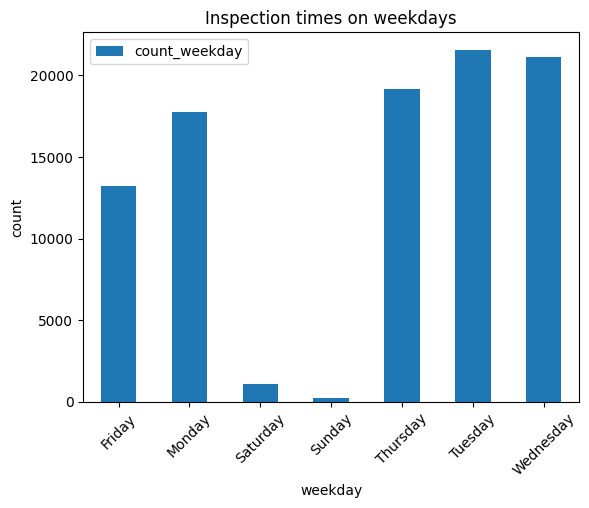

In [19]:
m = df.groupby('weekday').agg(count_weekday=('weekday','count'))
m.plot(kind='bar',
       # figsize=(5,2),
       xlabel='weekday',
       ylabel='count',
       rot=45, # rotate x label 
       # table=True,
       # xlim=300,
       # logy=True,
       title='Inspection times on weekdays',
      )

<Axes: title={'center': 'Inspection times on weekdays '}, ylabel='count_weekday'>

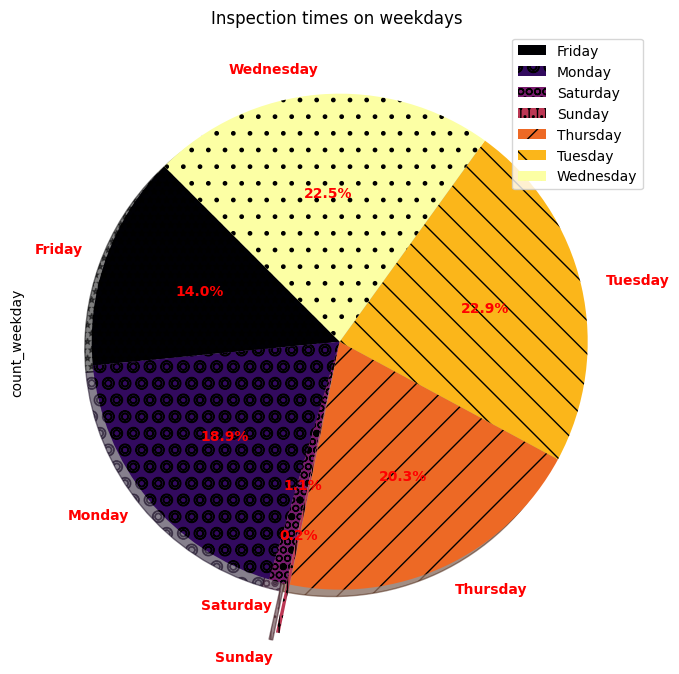

In [20]:
explode = (0.0, 0.0, 0.0, 0.2, 0.0, 0.0,0.0)
ax = m.plot(kind='pie', y='count_weekday',
       figsize=(8,15),
       colormap='inferno',
       explode = explode,
       shadow=True,
       autopct='%1.1f%%',
       startangle=135,
       hatch=['**', 'oO', 'O.O', '.||.', '/', '\\', '.'],
       title='Inspection times on weekdays ',

      )

from matplotlib.font_manager import FontProperties
font_props = FontProperties(weight='bold',)
for text in ax.texts:
    text.set_color('red')
    text.set_fontproperties(font_props)
ax

<Axes: title={'center': 'days'}, xlabel='inspection_date'>

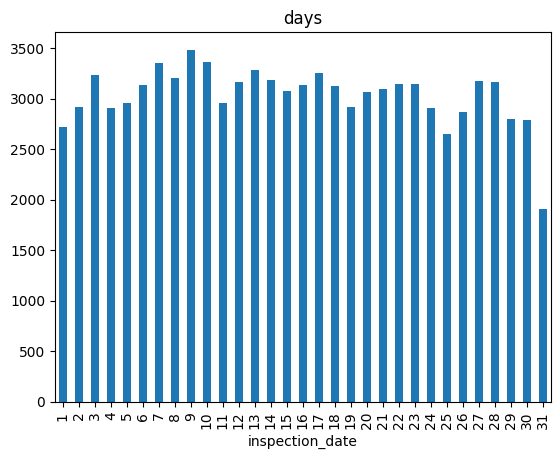

In [21]:
days_freq_gp = df.groupby([ df.inspection_date.dt.day]).agg('size')
days_freq_gp.plot(kind='bar', title="days")

<Axes: title={'center': 'months'}, xlabel='inspection_date'>

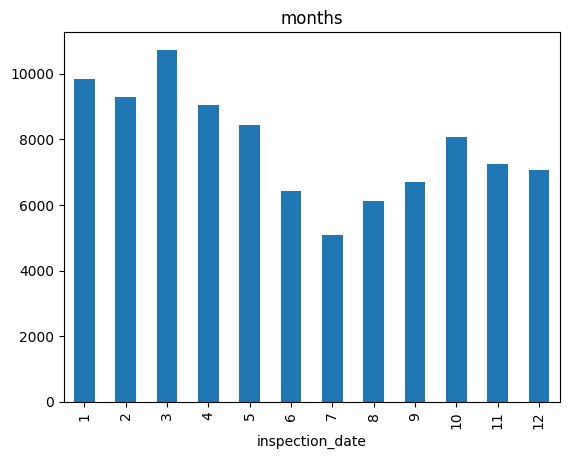

In [22]:
months_freq_gp = df.groupby([ df.inspection_date.dt.month]).agg('size')
months_freq_gp.plot(kind='bar', title="months")

<Axes: title={'center': 'years'}, xlabel='inspection_date'>

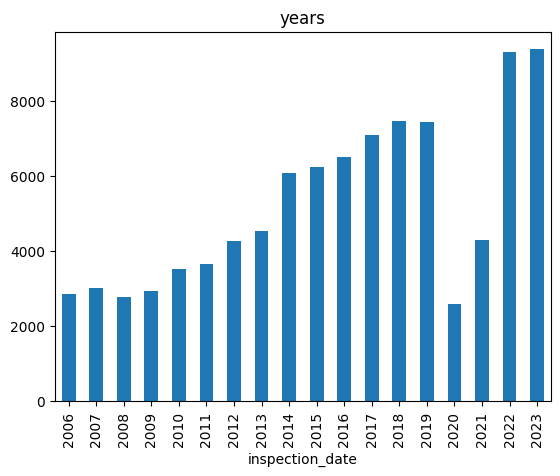

In [23]:
years_freq_gp = df.groupby([ df.inspection_date.dt.year]).agg('size')
years_freq_gp.plot(kind='bar', title="years")

<Axes: title={'center': 'years_months'}, xlabel='inspection_date,inspection_date'>

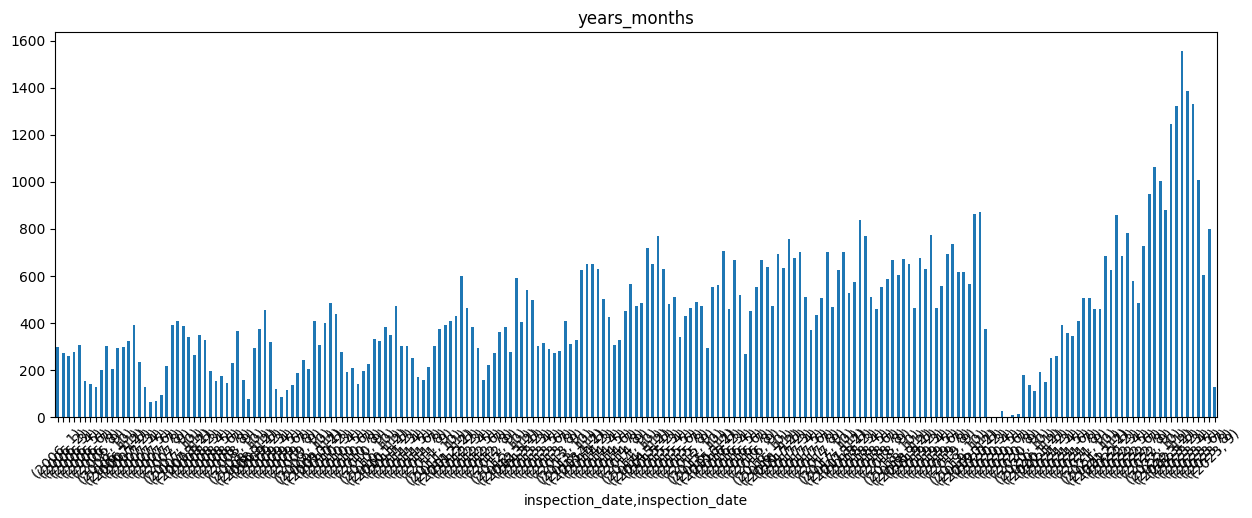

In [24]:
years_months_freq_gp = df.groupby([df.inspection_date.dt.year,df.inspection_date.dt.month]).agg('size')
years_months_freq_gp.plot(kind='bar', title="years_months", figsize=(15,5), legend=False, rot=45)

In [25]:
uniques = {}
uniques_count={}
df.apply(
    (
        lambda x: (uniques.update(
            {x.name:x.unique()}
        ),
          uniques_count.update(
              {x.name:len(x.unique())} 
          ))
    ),
    axis=0)
df_uniques = pd.DataFrame.from_dict(uniques_count, orient='index', columns=['Count'])
df_uniques = df_uniques.sort_values(by='Count', ascending=False)
df_uniques

,Count
violation_record_id,94087
inspection_serial_num,42308
business_id,6201
address,5840
latitude,5602
longitude,5601
name,5349
inspection_business_name,5349
phone,4882
inspection_date,4531


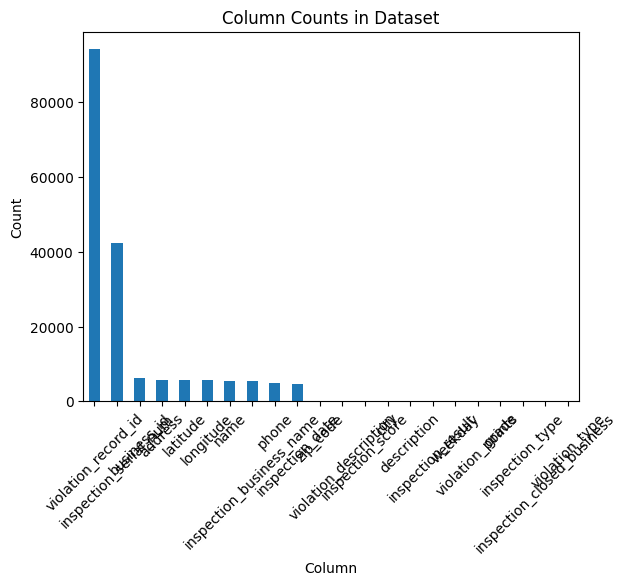

In [26]:
df_uniques = pd.DataFrame.from_dict(uniques_count, orient='index', columns=['Count'])

# Sort the DataFrame by count in descending order
df_uniques = df_uniques.sort_values(by='Count', ascending=False)
df_uniques
# Create the bar plot
ax = df_uniques.plot(kind='bar', legend=False)

# Set the axis labels and title
ax.set_xlabel('Column')
ax.set_ylabel('Count')
ax.set_title('Column Counts in Dataset')

# # Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# # Display the plot
plt.show()


In [27]:
pd.pivot_table(df,index=['city','name','grade'],columns=['violation_type'],aggfunc='size')

violation_type                                       BLUE   RED
city        name                              grade            
ALGONA      COCO JOE'S                        1.0    56.0  37.0
            TACOS EL TAJIN                    1.0     NaN   1.0
AUBURN      7-ELEVEN # 38940                  3.0     NaN  10.0
            7-ELEVEN #27219C                  2.0     3.0   5.0
            7-ELEVEN #35333B                  2.0    11.0  16.0
...                                                   ...   ...
WOODINVILLE WOODIN CREEK KITCHEN & TAP        1.0     NaN   1.0
            WOODINVILLE BAGEL BAKERY          2.0     2.0   7.0
            WOODINVILLE CAFE                  1.0     6.0  17.0
            WOODINVILLE CUT SHOP              1.0     3.0   4.0
            Walla Walla Steak Co- Woodinville 2.0     NaN   1.0

[5815 rows x 2 columns]

In [28]:
df_plot = df[['name','city','grade',]]
df_plot

,name,city,grade
0,#807 TUTTA BELLA,SEATTLE,1.0
1,#807 TUTTA BELLA,SEATTLE,1.0
2,#807 TUTTA BELLA,SEATTLE,1.0
3,#807 TUTTA BELLA,SEATTLE,1.0
7,+MAS CAFE,SEATTLE,2.0
...,...,...,...
255572,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,SEATTLE,2.0
255573,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,SEATTLE,2.0
255579,ZZ DESSERT,KENT,1.0
255580,ZZ DESSERT,KENT,1.0


In [29]:
x=df.sort_values(['latitude','longitude','violation_points'])

<Axes: >

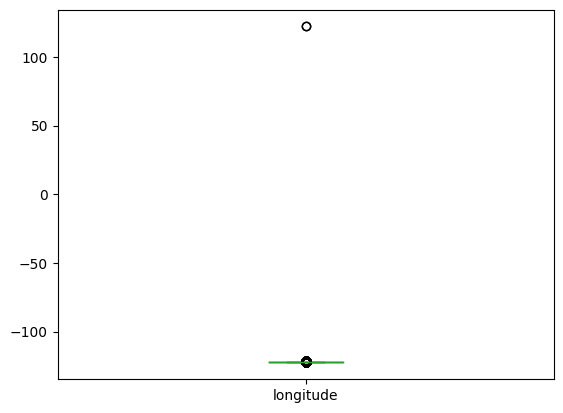

In [30]:
# Before remove outlier
df.longitude.plot(kind='box')

<Axes: >

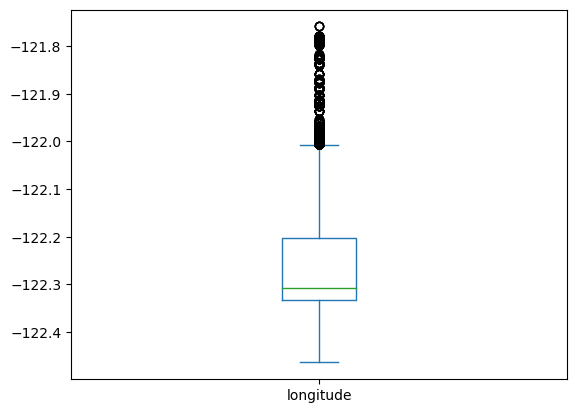

In [31]:
# Calculate the first quartile (Q1) and third quartile (Q3)
q1 = df[['latitude', 'longitude']].quantile(0.01)
q3 = df[['latitude', 'longitude']].quantile(0.90)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Define the lower and upper bounds for outlier detection
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter out rows that fall outside the acceptable range
df2 = df[((df[['latitude', 'longitude']] >= lower_bound) & (df[['latitude', 'longitude']] <= upper_bound)).all(axis=1)]

# After remove outlier
df2.longitude.plot(kind='box')

<Axes: title={'center': 'years'}, xlabel='inspection_date'>

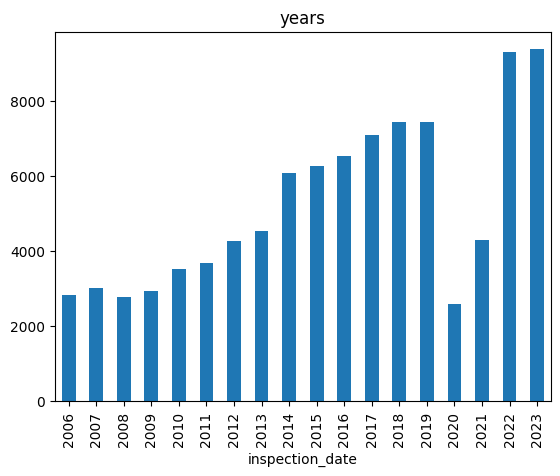

In [32]:
df2_years_freq_gp = df2.groupby([ df2.inspection_date.dt.year]).agg('size')
df2_years_freq_gp.plot(kind='bar', title="years")

In [33]:
df3=df2.copy()

lat_bins = np.arange(df3.latitude.min(), df3.latitude.max(), 0.1)
lon_bins = np.arange(df3.longitude.min(), df3.longitude.max(), 0.1)

# Create bins for latitude and longitude
df3['latitude_bin'] = pd.cut(df3['latitude'], lat_bins)
df3['longitude_bin'] = pd.cut(df3['longitude'], lon_bins)

# Perform aggregation on the bins
agg_df = df3.groupby(['latitude_bin', 'longitude_bin']).agg('size').reset_index().rename(columns={0: '_size'})
agg_df

,latitude_bin,longitude_bin,_size
0,"(47.195, 47.295]","(-122.464, -122.364]",0
1,"(47.195, 47.295]","(-122.364, -122.264]",557
2,"(47.195, 47.295]","(-122.264, -122.164]",486
3,"(47.195, 47.295]","(-122.164, -122.064]",19
4,"(47.195, 47.295]","(-122.064, -121.964]",641
5,"(47.195, 47.295]","(-121.964, -121.864]",18
6,"(47.195, 47.295]","(-121.864, -121.764]",0
7,"(47.295, 47.395]","(-122.464, -122.364]",262
8,"(47.295, 47.395]","(-122.364, -122.264]",3948
9,"(47.295, 47.395]","(-122.264, -122.164]",4178


In [35]:
df4 = df3.copy()
df4 = df4.groupby(['latitude_bin', 'longitude_bin','inspection_result']).agg('size').reset_index().rename(columns={0: '_size'}).sort_values(
    ['latitude_bin', 'longitude_bin','_size'], ascending=False)
df4.describe()
df4[df4._size>0].describe()
df4[df4._size>0]


,latitude_bin,longitude_bin,inspection_result,_size
339,"(47.595, 47.695]","(-121.964, -121.864]",Unsatisfactory,98
338,"(47.595, 47.695]","(-121.964, -121.864]",Satisfactory,13
329,"(47.595, 47.695]","(-122.064, -121.964]",Unsatisfactory,343
328,"(47.595, 47.695]","(-122.064, -121.964]",Satisfactory,89
321,"(47.595, 47.695]","(-122.064, -121.964]",Complete,6
...,...,...,...,...
29,"(47.195, 47.295]","(-122.264, -122.164]",Unsatisfactory,380
28,"(47.195, 47.295]","(-122.264, -122.164]",Satisfactory,95
21,"(47.195, 47.295]","(-122.264, -122.164]",Complete,11
19,"(47.195, 47.295]","(-122.364, -122.264]",Unsatisfactory,424


In [49]:
df3['violation_points']

0         15
1          5
2          5
3          5
7          5
          ..
255572     5
255573    10
255579     5
255580     5
255581     5
Name: violation_points, Length: 93955, dtype: int64

In [51]:
df3.inspection_score

0         20.0
1         20.0
2         10.0
3         10.0
7         30.0
          ... 
255572    15.0
255573    15.0
255579    10.0
255580    10.0
255581     5.0
Name: inspection_score, Length: 93955, dtype: float64

In [53]:
df.violation_type

0          RED
1          RED
2         BLUE
3          RED
7         BLUE
          ... 
255572     RED
255573     RED
255579    BLUE
255580    BLUE
255581     RED
Name: violation_type, Length: 94087, dtype: object